# Cryptocurrency prices

* **Filename:**  `cryptocurrencies.csv`
* **Description:** Cryptocurrency prices for a handful of coins over time.
* **Source:** https://coinmarketcap.com/all/views/all/ but from a million years ago (I cut and pasted, honestly)

### Make a chart of bitcoin's high, on a weekly basis

You might want to do the cherry blossoms homework first, or at least read the part about `format=` and `pd.to_datetime`.

*Yes, that's the entire assignment. It isn't an exciting dataset, but it's just dirty enough to make charting this a useful experience.*

In [1]:
import pandas as pd 

df = pd.read_csv('cryptocurrencies.csv')

In [2]:
df

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,"8,141.43","8,985.92","8,141.43","8,926.57","6,256,440,000","137,258,000,000",BTC
1,11-Feb-18,"8,616.13","8,616.13","7,931.10","8,129.97","6,122,190,000","145,245,000,000",BTC
2,10-Feb-18,"8,720.08","9,122.55","8,295.47","8,621.90","7,780,960,000","146,981,000,000",BTC
3,9-Feb-18,"8,271.84","8,736.98","7,884.71","8,736.98","6,784,820,000","139,412,000,000",BTC
4,8-Feb-18,"7,637.86","8,558.77","7,637.86","8,265.59","9,346,750,000","128,714,000,000",BTC
...,...,...,...,...,...,...,...,...
2260,17-Feb-17,13.07,13.34,13.04,13.3,"1,711,010","182,332,000",XMR
2261,16-Feb-17,13.62,13.62,12.91,13.1,"3,256,190","189,926,000",XMR
2262,15-Feb-17,13.01,13.74,12.88,13.62,"4,811,600","181,497,000",XMR
2263,14-Feb-17,12.2,13.2,12.11,12.99,"4,166,850","170,135,000",XMR


In [3]:
df.dtypes


date          object
open          object
high          object
low           object
close         object
volume        object
market_cap    object
coin          object
dtype: object

In [4]:
df.replace(',','', regex=True, inplace=True)

In [5]:
df

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC
...,...,...,...,...,...,...,...,...
2260,17-Feb-17,13.07,13.34,13.04,13.3,1711010,182332000,XMR
2261,16-Feb-17,13.62,13.62,12.91,13.1,3256190,189926000,XMR
2262,15-Feb-17,13.01,13.74,12.88,13.62,4811600,181497000,XMR
2263,14-Feb-17,12.2,13.2,12.11,12.99,4166850,170135000,XMR


In [6]:
df.coin.value_counts()

ETH      365
XMR      365
LTC      365
XRP      365
BTC      365
MIOTA    245
BCH      195
Name: coin, dtype: int64

In [29]:
df_bitcoin = df.iloc[:365]

In [36]:
df_bitcoin['date'] = pd.to_datetime(df_bitcoin.date, format='%d-%b-%y', errors = 'coerce').dropna()
df_bitcoin.date

<ipython-input-36-fde652a037e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin['date'] = pd.to_datetime(df_bitcoin.date, format='%d-%b-%y', errors = 'coerce').dropna()


0     2018-02-12
1     2018-02-11
2     2018-02-10
3     2018-02-09
4     2018-02-08
         ...    
360   2017-02-17
361   2017-02-16
362   2017-02-15
363   2017-02-14
364   2017-02-13
Name: date, Length: 365, dtype: datetime64[ns]

In [37]:
# I don't know why this won't work and I give up. 

In [39]:
df_bitcoin["week"]= df_bitcoin.date.dt.strftime("%W")

<ipython-input-39-412de3ea8221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["week"]= df_bitcoin.date.dt.strftime("%W")


In [40]:
df_bitcoin['high'] = df_bitcoin['high'].astype(float)

<ipython-input-40-f5244d52af66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin['high'] = df_bitcoin['high'].astype(float)


In [41]:
df_bitcoin.dtypes

date          datetime64[ns]
open                  object
high                 float64
low                   object
close                 object
volume                object
market_cap            object
coin                  object
week                  object
dtype: object

<AxesSubplot:xlabel='week'>

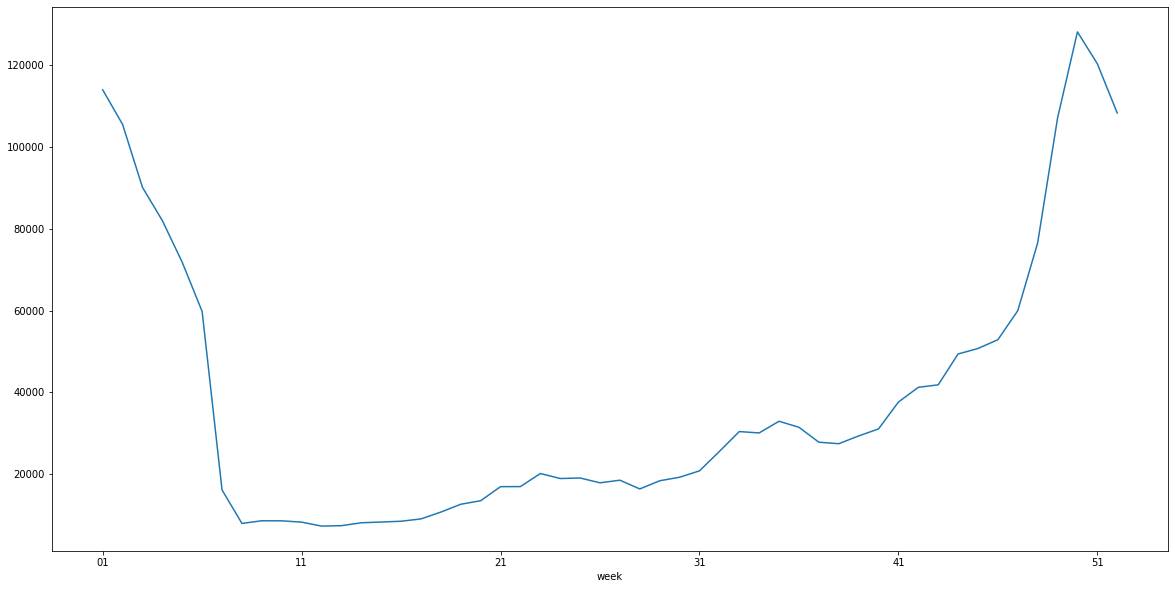

In [48]:
df_bitcoin.groupby('week').high.sum().plot(figsize = (20, 10))

<AxesSubplot:>

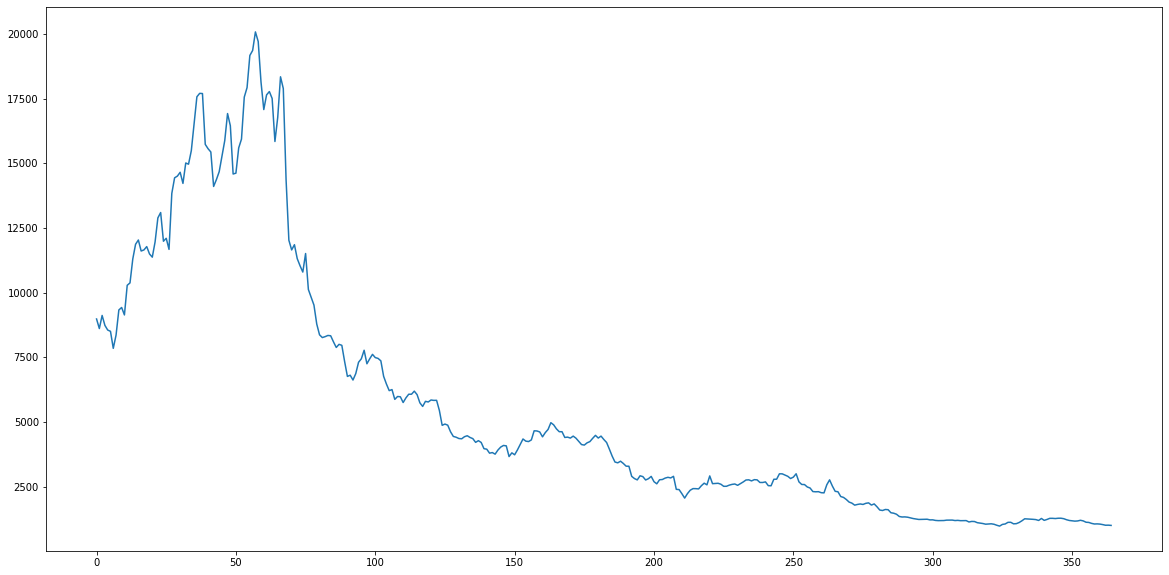

In [47]:
df_bitcoin.high.plot(x = 'date', y= 'high', figsize = (20, 10))

In [127]:
df_bitcoin.plot

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'